Consider the PDF shown to the right (it may take a second to load!). Which of the following is true?

x is more likely than not less than 10.
xis more likely than not greater than 10.
We cannot tell from the PDF if xis more likely to be greater than or less than 10.
This is not a valid PDF because it has two peaks

Interpreting CDFs

At right is the CDF corresponding to the PDF you considered in the last exercise. Using the CDF, what is the probability that x
is greater than 10?

0.25
0.75
3.75
15

In [1]:
import numpy as np
import matplotlib .pyplot as plt
%matplotlib inline

/home/deepanshu/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


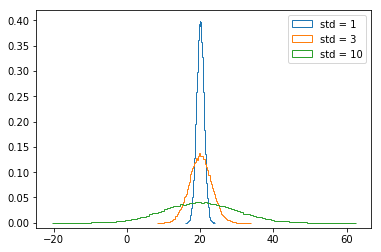

In [2]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
import numpy as np
samples_std1 = np.random.normal(   20 ,1 , 100000 )
samples_std3 = np.random.normal(   20 ,3 , 100000 )
samples_std10 = np.random.normal(   20 ,10 , 100000 )
#print(samples_std1.shape)


# Make histograms
plt.hist(  samples_std1  ,normed=True ,  histtype='step'  , bins= 100)

plt.hist(  samples_std3  ,normed=True ,  histtype='step'  , bins= 100)

plt.hist(  samples_std10  ,normed=True ,  histtype='step'  , bins= 100)



# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


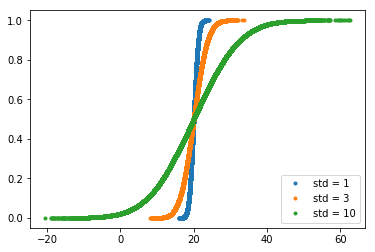

In [4]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3) 
x_std10, y_std10 = ecdf(samples_std10)



# Plot CDFs
plt.plot(x_std1, y_std1 , marker = '.' , linestyle ='none')
plt.plot(x_std3, y_std3 , marker = '.' , linestyle ='none')
plt.plot(x_std10, y_std10 , marker = '.' , linestyle ='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


In [6]:
belmont_no_outliers = [148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ]

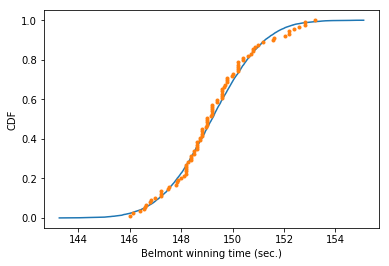

In [7]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)


# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal( mu, sigma,  10000   )

# Get the CDF of the samples and of the data
x, y = ecdf(belmont_no_outliers)
x_theor, y_theor = ecdf(samples)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


What are the chances of a horse matching or beating Secretariat's record?

Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [8]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal( mu, sigma,  1000000   )

# Compute the fraction that are faster than 144 seconds: prob
prob= np.sum( samples <= 144.0 ) / len (samples )

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.00063


Waiting for the next Secretariat

Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? Choose the best answer.

Normal, because the distribution of Belmont winning times are Normally distributed.
press
1
Normal, because there is a most-expected waiting time, so there should be a single peak to the distribution.
press
2
Exponential: It is very unlikely for a horse to be faster than Secretariat, so the distribution should decay away to zero for high waiting time.
press
3
Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.

In [10]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2


/home/deepanshu/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


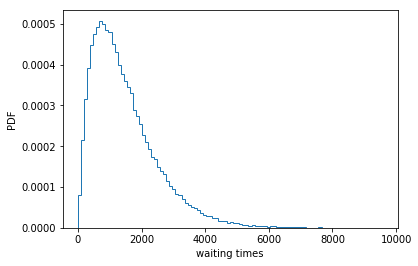

In [11]:
# Draw samples of waiting times: waiting_times
waiting_times= successive_poisson(764, 715, 100000)

# Make the histogram

plt.hist(waiting_times , bins =100 , normed= True , histtype='step')

# Label axes
plt.xlabel('waiting times')
plt.ylabel('PDF')

# Show the plot
plt.show()
